# Imports


In [127]:
import pandas as pd
import numpy as np
import math
import cvxopt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.metrics import roc_curve,precision_recall_curve

# Getting the Data

The Dataset I have selected is Heart Disease of Kaggle.
The link of Dataset:- https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [2]:
df=pd.read_csv('C:\\archive\\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information:

1.age
2.sex (1 = male; 0 = female)
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.target: 1=Heart attack 0=non Heart attack

In [4]:
print("The Missing Values in the dataset in % ")
print((df.isnull().sum()/len(df))*100)

The Missing Values in the dataset in % 
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis (EDA)

Pie Plot of Target


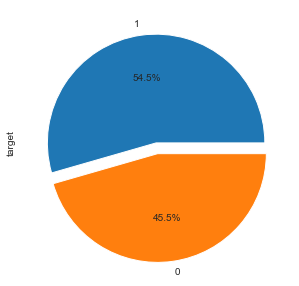

In [6]:
# First let's Explore the target column
plt.figure(figsize=(5,5))
df['target'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0.1])
print("Pie Plot of Target")

So we have a Balanced Dataset

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

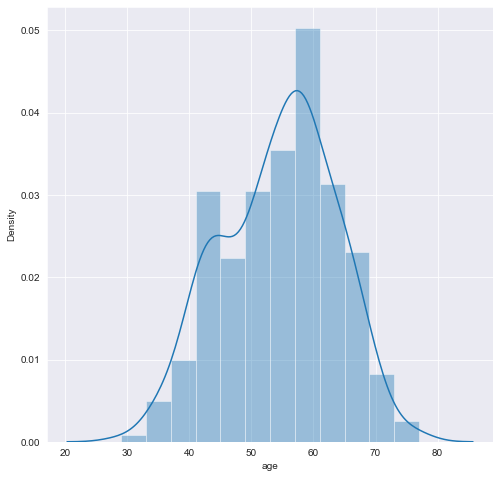

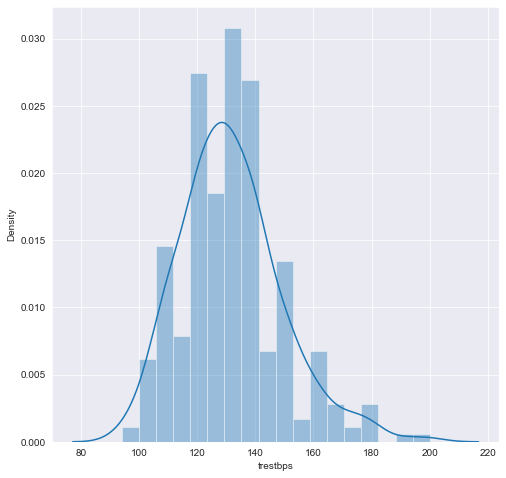

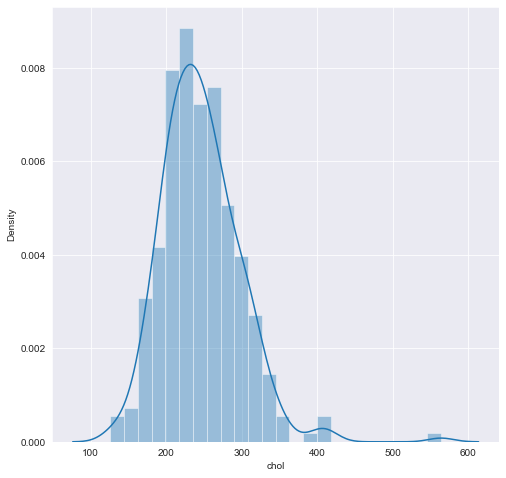

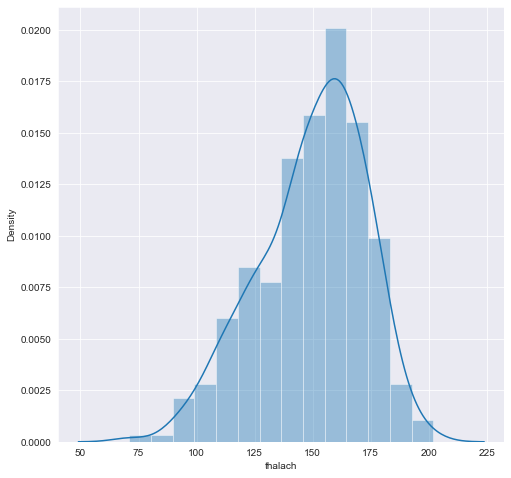

In [7]:
for col in ['age','trestbps','chol','thalach']:
    plt.figure(figsize=(8,8))
    sns.distplot(df[col])
    

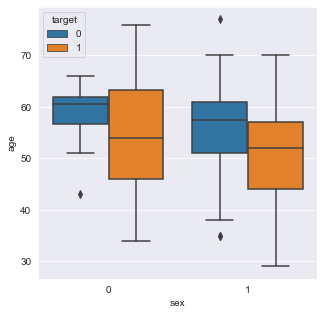

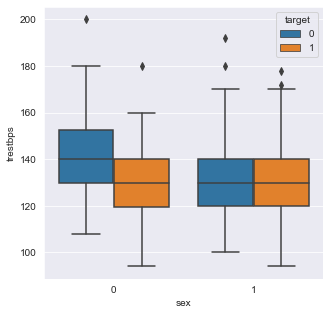

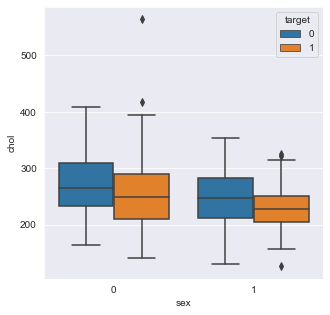

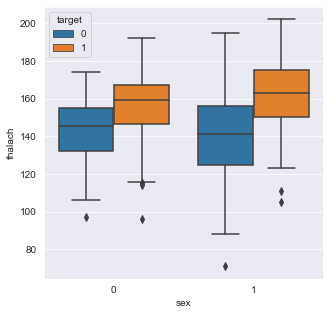

In [8]:
for col in ['age','trestbps','chol','thalach']:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df['sex'],y=df[col],hue=df['target'])

1.For Men the present blood pressure of people who recieved heart attack and who don't is same.

2.The Maximum heart rate achieved  is high for people who recieved heartattack irrespective of their sex


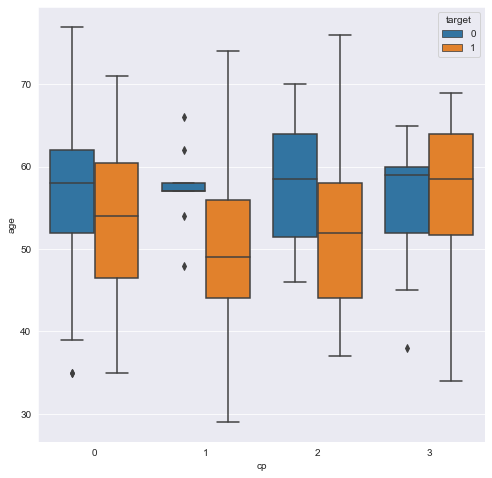

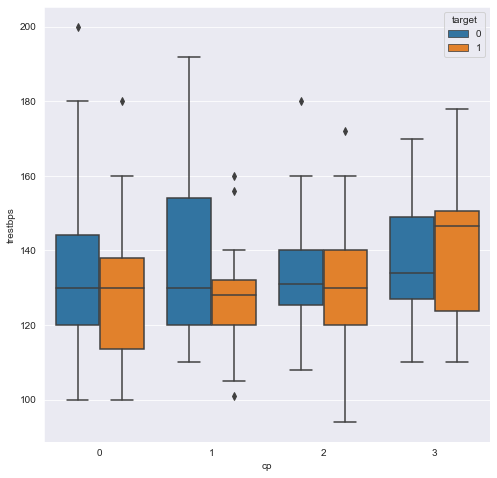

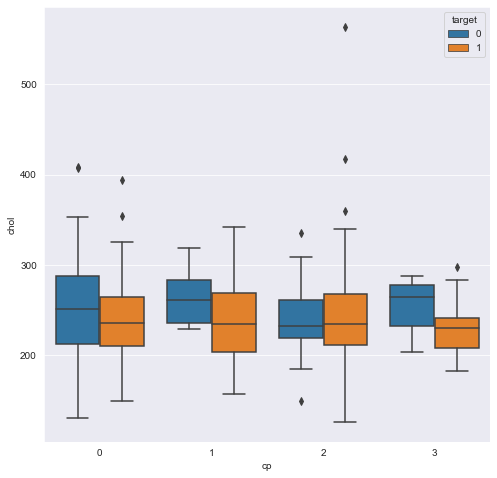

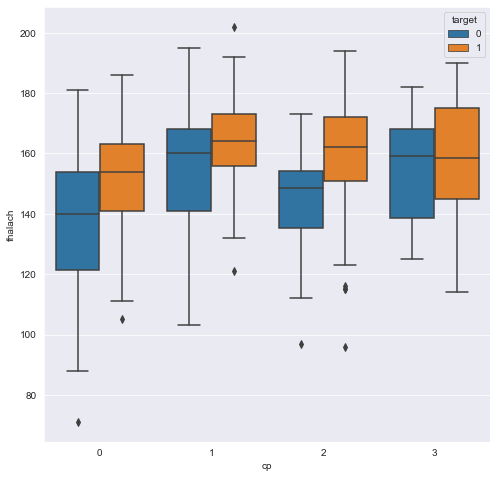

In [9]:
for col in ['age','trestbps','chol','thalach']:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=df['cp'],y=df[col],hue=df['target'])

1.If the Age is greather then 60 and if the chest pain is of type 4 then it is definitely heart-attack

2.The Maximum heart rate achieved  is high for people who recieved heartattack irrespective of their chest pain type

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

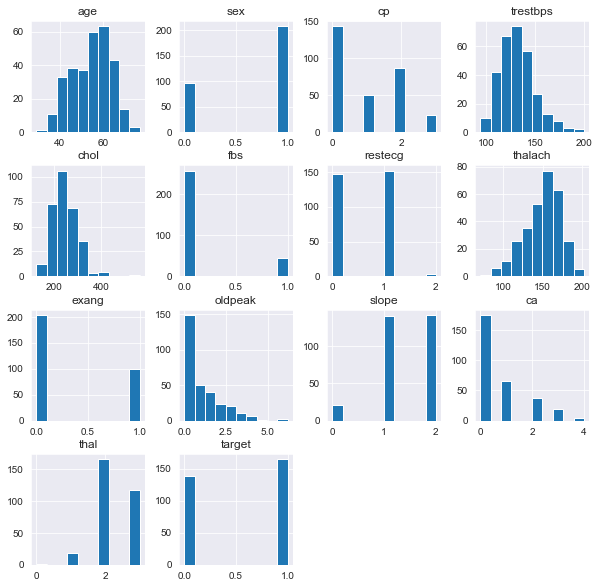

In [10]:

df.hist(figsize=(10,10))

<AxesSubplot:xlabel='age', ylabel='chol'>

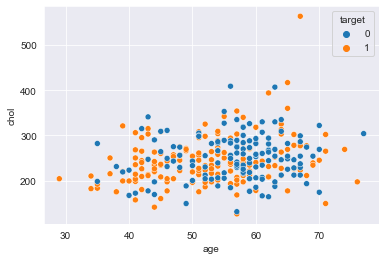

In [11]:
sns.scatterplot(x=df['age'],y=df['chol'],color='red',hue=df['target'])

The Point with chol value greather then 500 is a outlier 
So removing it

In [12]:
df=df[df['chol']<500]

Text(0, 0.5, 'Thalach')

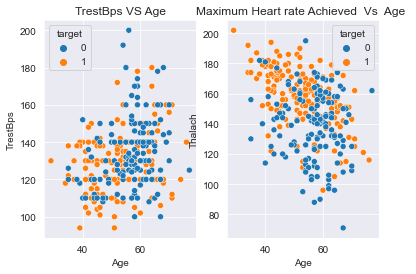

In [13]:
plt.subplot(1,2,1)
sns.scatterplot(x=df['age'],y=df['trestbps'],color='r',hue=df['target'], sizes=(20, 200))
plt.title("TrestBps VS Age")
plt.xlabel("Age")
plt.ylabel("TrestBps")
plt.subplot(1,2,2)
sns.scatterplot(x=df['age'],y=df['thalach'],hue=df['target'],color='y', sizes=(20, 200))
plt.title("Maximum Heart rate Achieved  Vs  Age ")
plt.xlabel("Age")
plt.ylabel("Thalach")

1. As Age increases Cholestrol and resting blood-Pressure also increases

2. As Age increases Maximum Heart-rate achieved decreases

<AxesSubplot:>

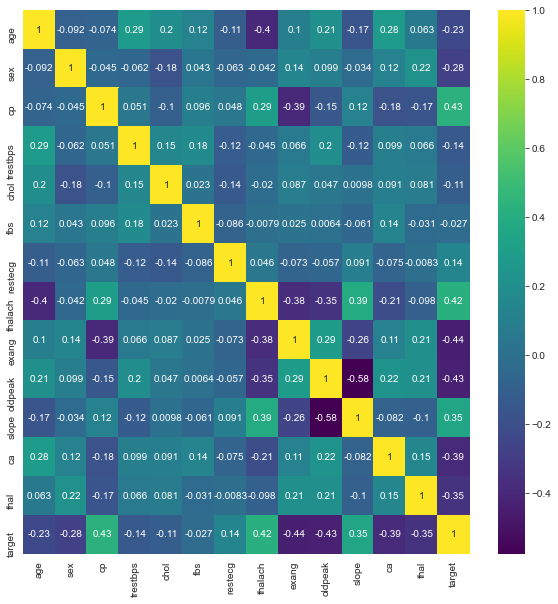

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Text(0, 0.5, 'Count')

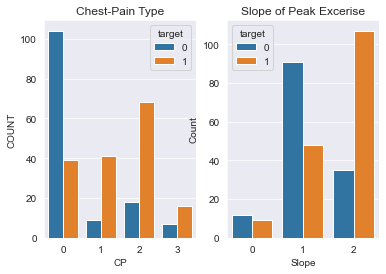

In [15]:
plt.subplot(1,2,1)
sns.countplot(x='cp',hue='target',data=df,)
plt.title("Chest-Pain Type")
plt.xlabel("CP")
plt.ylabel("COUNT")
plt.subplot(1,2,2)
sns.countplot(x='slope',hue='target',data=df)
plt.title("Slope of Peak Excerise")
plt.xlabel("Slope")
plt.ylabel("Count")

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:xlabel='cp', ylabel='slope'>

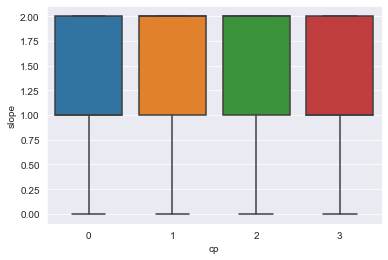

In [17]:
sns.boxplot(x=df['cp'],y=df['slope'])

# Questions

1. What is risk level of resting blood Pressure above which channces of Heart-Attack are more for people more then age 50?

In [18]:
df_50=df[df['age']>50]


In [19]:
df_50_heart_attack=df_50[df_50['target']==1]
df_50_not_heart_attack=df_50[df_50['target']==0]

In [20]:
df_50_heart_attack['trestbps'].mean()

132.76530612244898

Text(0.5, 1.0, 'TrestBps for Non-Heart Attack')

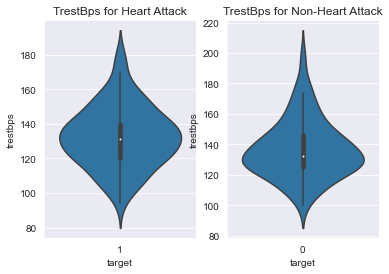

In [21]:
plt.subplot(1,2,1)
sns.violinplot(x=df_50_heart_attack['target'],y=df_50_heart_attack['trestbps'])
plt.title("TrestBps for Heart Attack")
plt.subplot(1,2,2)
sns.violinplot(x=df_50_not_heart_attack['target'],y=df_50_not_heart_attack['trestbps'])
plt.title("TrestBps for Non-Heart Attack")

Hence from above plot we can say that risk level of Blood-Pressure for people above age of 50 is approx 132 mm/Hg

2. How does Cholestrol vary with Age ?

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='chol'>

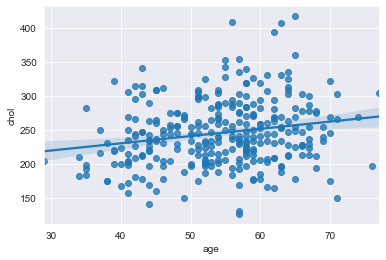

In [22]:
sns.regplot(df['age'],df['chol'])

    From the above plot we can see that the relationship between is quite linear. So as Age increases Cholestrol also increases.

In [23]:
cv=df.copy()
cv['age']=pd.cut(cv['age'],bins=[10,19,29,39,49,59,69,79,89],labels=['Teens','20s','30s','40s','50s','60s','70s','80s'])

<BarContainer object of 302 artists>

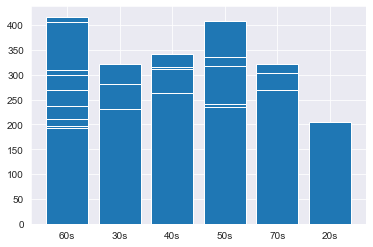

In [24]:
plt.bar(cv['age'],height=cv['chol'])

# Preparing the Data for Machine Learning Models

In [27]:
scaler=StandardScaler()
X=df.drop('target',1)
y=df['target'].values

In [28]:
X=scaler.fit_transform(X)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Classifier 1:- Decision Trees

In [30]:
def divide_on_feature(X,feature_i,threshold):
    sub=None
    if(isinstance(threshold,int) or isinstance(threshold,float)):
        sub=lambda sample: sample[feature_i]>=threshold
    else:
        sub=lambda sample:sample[feature_i]==threshold
    x1=[sample for sample in X if sub(sample)]
    x2=[sample for sample in X if not sub(sample)]
    return np.array(x1),np.array(x2)

In [31]:
def calculate_variance(X):
    
    mean = np.ones(np.shape(X)) * X.mean(0)

    n_samples = np.shape(X)[0]

    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    return variance

In [32]:
def calculate_entropy(y):
    log2 = lambda x: math.log(x) / math.log(2)

    unique_labels = np.unique(y)

    entropy = 0

    for label in unique_labels:

        count = len(y[y == label])

        p = count / len(y)

        entropy += -p * log2(p)

    return entropy 

In [33]:
class Decision_node():
    def __init__(self,feature_i=None,threshold=None,value=None,true_branch=None,false_branch=None):
        self.feature_i=feature_i
        self.threshold=threshold
        self.value=value
        self.true_branch=true_branch
        self.false_branch=false_branch
class Decision_tree(object):
    def __init__(self,min_samples_split=2,max_depth=float("inf"),min_impurity=1e-7,loss=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.min_impurity=min_impurity
        self.loss=loss
        self.impurity_calculation=None
        self.leaf_calculation=None
        self.one_dim=None
    def fit(self,X,y,loss=None):
        self.one_dim = len(np.shape(y)) == 1
        self.root=self.create_tree(X,y)
        self.loss=None
    def create_tree(self,X,y,current_depth=0):
        max_impurity=0
        best_criteria=None
        best_sets=None
        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        # Add y as last column of X
        Xy = np.concatenate((X, y), axis=1)
        samples,features=np.shape(X)
        if(samples>self.min_samples_split and current_depth<=self.max_depth):
            for feature_i in range(features):
                feature_values=np.expand_dims(X[:,feature_i],axis=1)
                unique_values=np.unique(feature_values)
                for threshold in unique_values:
                    x1,x2=divide_on_feature(Xy,feature_i,threshold)
                    if(len(x1)>0 and len(x2)>0):
                        y1=x1[:,features:]
                        y2=x2[:,features:]
                        impurity=self.impurity_calculation(y,y1,y2)
                        if(impurity>max_impurity):
                            max_impurity=impurity
                            best_criteria={"feature_i":feature_i,"threshold":threshold}
                            best_sets={"left_X":x1[:,:features],
                                      "left_y":x1[:,features:],
                                      "rigth_X":x2[:,:features],
                                      "right_y":x2[:,features:]}
            
        if(max_impurity>self.min_impurity):
            true_branch=self.create_tree(best_sets["left_X"],best_sets["left_y"],current_depth+1)
            false_branch=self.create_tree(best_sets["rigth_X"],best_sets["right_y"],current_depth+1)
            return Decision_node(feature_i=best_criteria["feature_i"],threshold=best_criteria["threshold"],true_branch=true_branch,false_branch=false_branch)
        leaf_value=self.leaf_calculation(y)
        return Decision_node(value=leaf_value)
    

    def predict_value(self, x, tree=None):
        """ Do a recursive search down the tree and make a prediction of the data sample by the
            value of the leaf that we end up at """

        if tree is None:
            tree = self.root

        # If we have a value (i.e we're at a leaf) => return value as the prediction
        if tree.value is not None:
            return tree.value

        # Choose the feature that we will test
        feature_value = x[tree.feature_i]

        # Determine if we will follow left or right branch
        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        # Test subtree
        return self.predict_value(x, branch)

    def predict(self, X):
        """ Classify samples one by one and return the set of labels """
        y_pred = [self.predict_value(sample) for sample in X]
        return y_pred
class DecisionRegression(Decision_tree):
    def calculate_variance_reduction(self,y,y1,y2):
        total=calculate_variance(y)
        y1_var=calculate_variance(y1)
        y2_var=calculate_variance(y2)
        fract_y1=len(y1)/len(y)
        fract_y2=len(y2)/len(y)
        tot=total-(fract_y1*y1_var+fract_y2*y2_var)
        return sum(tot)
    def mean_value(self,y):
        y_mean=np.mean(y,axis=0)
        return y_mean if len(y)>1 else y_mean[0]
    def fit(self,X,y):
        self.impurity_calculation=self.calculate_variance_reduction
        self.leaf_calculation=self.mean_value
        super(DecisionRegression,self).fit(X,y)
class DecisionClassification(Decision_tree):
    def _calculate_information_gain(self, y, y1, y2):
        # Calculate information gain
        p = len(y1) / len(y)
        entropy = calculate_entropy(y)
        info_gain = entropy - p * \
            calculate_entropy(y1) - (1 - p) * \
            calculate_entropy(y2)

        return info_gain
    def _majority_vote(self, y):
        most_common = None
        max_count = 0
        for label in np.unique(y):
            # Count number of occurences of samples with label
            count = len(y[y == label])
            if count > max_count:
                most_common = label
                max_count = count
        return most_common
    def fit(self,X,y):
        self.impurity_calculation=self._calculate_information_gain
        self.leaf_calculation=self._majority_vote
        super(DecisionClassification,self).fit(X,y)
            
        

In [168]:
dt=DecisionClassification(max_depth=3)
dt.fit(X_train,y_train)

In [169]:
pred_train=dt.predict(X_train)
pred_test_dt=dt.predict(X_test)
print("Traning Accuracy is =",np.round(accuracy_score(y_train,pred_train)*100,2),"%")
print("Testing  Accuracy is =",np.round(accuracy_score(y_test,pred_test_dt)*100,2),"%")

Traning Accuracy is = 87.14 %
Testing  Accuracy is = 78.69 %


In [108]:
print(classification_report(y_test,pred_test_dt))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



<AxesSubplot:>

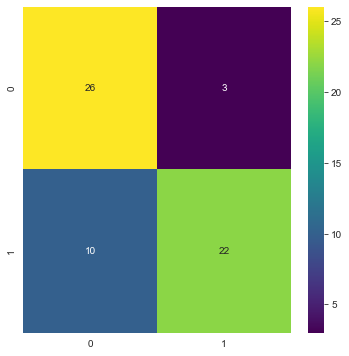

In [109]:
cm=confusion_matrix(y_test,pred_test_dt)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,cmap='viridis')

Text(0, 0.5, 'True Positive Rate')

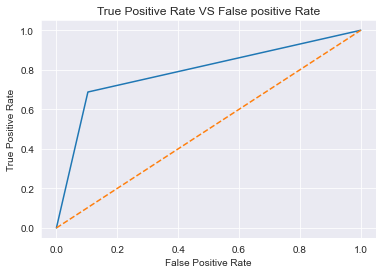

In [140]:
fpr,tpr,thresholds=roc_curve(y_test,pred_test_dt)
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')
plt.title("True Positive Rate VS False positive Rate")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'PRECISION')

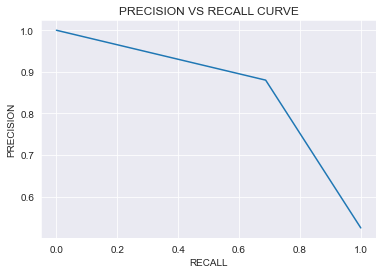

In [139]:
precision,recall,thresholds=precision_recall_curve(y_test,pred_test_dt)
plt.plot(recall,precision)
plt.title("PRECISION VS RECALL CURVE")
plt.xlabel("RECALL")
plt.ylabel("PRECISION")

# Classifier 2:- Random Forest 

In [42]:
def random_subsets(X,y,n_est,replacement=True):
    Xy=np.concatenate((X,y.reshape((1, len(y))).T),axis=1)
    data=[]
    n_samples=X.shape[0]
    n_size=n_samples//2
    if replacement:
        n_size=n_samples
    for i in range(n_est):
        idx=np.random.choice(range(n_samples),size=np.shape(range(n_size)),replace=replacement)
        X=Xy[idx][:,:-1]
        y=Xy[idx][:,-1]
        data.append([X,y])
    return data

In [43]:
class RandomForest():
    def __init__(self,n_estimators=100,min_samples_split=2,min_impurity=1e-07,max_depth=float("inf"),max_features=None):
        self.n_estimators=n_estimators
        self.min_samples_split=min_samples_split
        self.min_impurity=min_impurity
        self.max_depth=max_depth
        self.max_features=max_features
        self.tree=[]
        for i in range(self.n_estimators):
            self.tree.append(DecisionClassification(min_samples_split=self.min_samples_split,min_impurity=self.min_impurity,max_depth=self.max_depth))
    def fit(self,X,y):
        features=np.shape(X)[1]
        if not self.max_features:
            self.max_features=int(math.sqrt(features))
        subsets=random_subsets(X,y,self.n_estimators)
        for i in range(self.n_estimators):
            Xi,yi=subsets[i]
            idx=np.random.choice(range(features),size=self.max_features,replace=True)
            Xi=Xi[:,idx]
            self.tree[i].feature_i=idx
            self.tree[i].fit(Xi,yi)
    def predict(self,X):
        y_pred=np.empty((X.shape[0],len(self.tree)))
        for i,tre in enumerate(self.tree):
            idx=tre.feature_i
            Xi=X[:,idx]
            prediction=tre.predict(Xi)
            y_pred[:,i]=prediction
        y_preds=[]
        for prediction in y_pred:
            y_preds.append(np.bincount(prediction.astype('int')).argmax())
        return y_preds    
            

In [170]:
rfc=RandomForest(n_estimators=400,max_depth=3)
rfc.fit(X_train,y_train)

In [171]:
pred_train_rf=rfc.predict(X_train)
pred_test_rf=rfc.predict(X_test)
print("Traning Accuracy is =",np.round(accuracy_score(y_train,pred_train_rf)*100,2),"%")
print("Testing  Accuracy is =",np.round(accuracy_score(y_test,pred_test_rf)*100,2),"%")

Traning Accuracy is = 89.63 %
Testing  Accuracy is = 88.52 %


<AxesSubplot:>

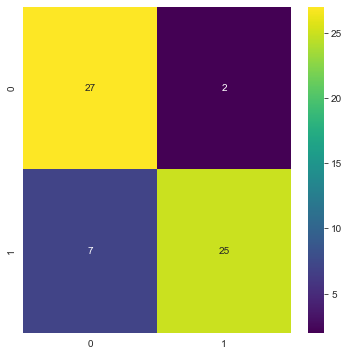

In [155]:
cm=confusion_matrix(y_test,pred_test_rf)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,cmap='viridis')

Text(0, 0.5, 'True Positive Rate')

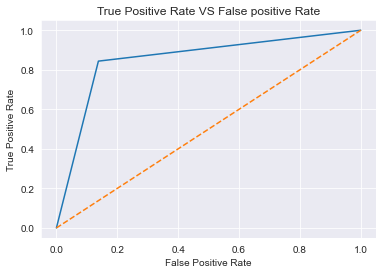

In [141]:
fpr,tpr,thresholds=roc_curve(y_test,pred_test_rf)
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')
plt.title("True Positive Rate VS False positive Rate")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'PRECISION')

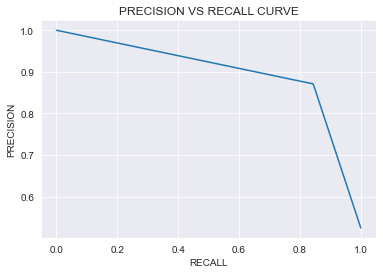

In [142]:
precision,recall,thresholds=precision_recall_curve(y_test,pred_test_rf)
plt.plot(recall,precision)
plt.title("PRECISION VS RECALL CURVE")
plt.xlabel("RECALL")
plt.ylabel("PRECISION")

# KNeighbors 

In [58]:
def euclidean_distance(x1,x2):
    distance=0
    for i in range(len(x1)):
        distance+=np.power((x1[i]-x2[i]),2)
    return distance

In [59]:
class KNearestNeighbors():
    def __init__(self,n_neighbors=5):
        self.n_neighbors=n_neighbors
    def vote(self,neighbors):
        p=np.bincount(neighbors.astype('int'))
        return p.argmax()
    def predict(self,X_train,y_train,X_test):
        y_pred=np.empty(X_test.shape[0])
        for i,sample in enumerate(X_test):
            idx=np.argsort([euclidean_distance(sample,x) for x in X_train])[:self.n_neighbors]
            pred=np.array([y_train[i] for i in idx])
            y_pred[i]=self.vote(pred)
        return y_pred 

In [172]:
ab=KNearestNeighbors()
pred_KN=ab.predict(X_train,y_train,X_test)

In [173]:
print("The Test  Accuracy = ",accuracy_score(y_test,pred)*100,"%")

The Test  Accuracy =  83.60655737704919 %


In [105]:
print(classification_report(y_test,pred_KN))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



<AxesSubplot:>

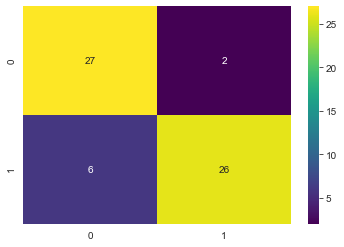

In [106]:
cm=confusion_matrix(y_test,pred_KN)
sns.heatmap(cm,annot=True,cmap='viridis')

Text(0, 0.5, 'True Positive Rate')

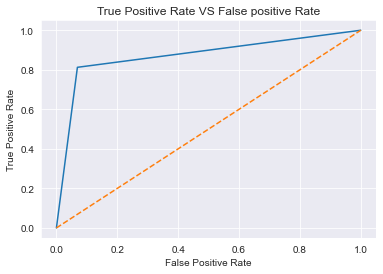

In [143]:
fpr,tpr,thresholds=roc_curve(y_test,pred_KN)
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')
plt.title("True Positive Rate VS False positive Rate")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'PRECISION')

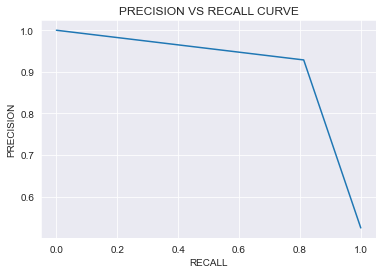

In [144]:
precision,recall,thresholds=precision_recall_curve(y_test,pred_KN)
plt.plot(recall,precision)
plt.title("PRECISION VS RECALL CURVE")
plt.xlabel("RECALL")
plt.ylabel("PRECISION")

# Logistic Regression

In [75]:
class Sigmoid():
    def __call__(self,x):
        return 1/ (1+np.exp(-x))

In [114]:
class Logistic_Regression():
    def __init__(self,learning_rate=.1):
        self.learning_rate=learning_rate
        self.sigmoid=Sigmoid()
        self.param=None
    def intialize_parameters(self,X):
        features=np.shape(X)[1]
        limit=1/math.sqrt(features)
        self.param=np.random.uniform(-limit,limit,(features,))
    def fit(self,X,y,iterations=4000):
        self.intialize_parameters(X)
        for i in range(iterations):
            pred=self.sigmoid(X.dot(self.param))
            self.param-=self.learning_rate*X.T.dot(pred-y)
    def predict(self,X):
        return np.round(self.sigmoid(X.dot(self.param))).astype(int)

In [174]:
lr=Logistic_Regression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)

In [175]:
print("The Test Accuracy is =",accuracy_score(y_test,lr.predict(X_test))*100,"%")

The Test Accuracy is = 83.60655737704919 %


In [117]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<AxesSubplot:>

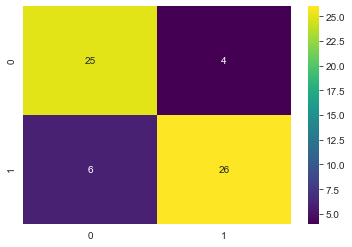

In [118]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,cmap='viridis')

Text(0, 0.5, 'True Positive Rate')

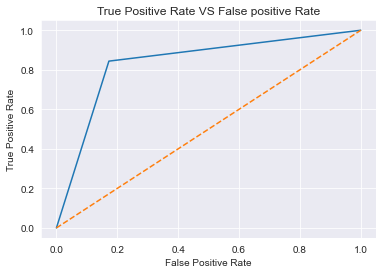

In [145]:
fpr,tpr,thresholds=roc_curve(y_test,pred_lr)
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')
plt.title("True Positive Rate VS False positive Rate")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'PRECISION')

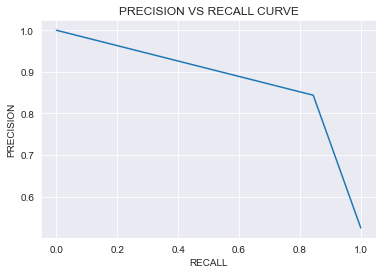

In [146]:
precision,recall,thresholds=precision_recall_curve(y_test,pred_lr)
plt.plot(recall,precision)
plt.title("PRECISION VS RECALL CURVE")
plt.xlabel("RECALL")
plt.ylabel("PRECISION")

# STACKING 

In [149]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
rfc=RandomForestClassifier()
xgc=XGBClassifier()

In [150]:
! pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19884 sha256=58613252b2ada74abf34b3f6ae953ca60ec66315e121534543385c4503e207b7
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\17\89\0b\21d5484cbf713c95b641ec1bdc40dd7ae798cbdea2337e3535
Successfully built vecstack


In [176]:
from vecstack import stacking
paras=[RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3),
]
s_train,s_test=stacking(paras,X_train,y_train,X_test,regression=False)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:30:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [177]:
model=XGBClassifier().fit(s_train,y_train)
pred_stc=model.predict(s_test)
print("The Test Accuracy is =",accuracy_score(y_test,pred_stc))

[22:30:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Test Accuracy is = 0.8688524590163934


In [178]:
print(classification_report(y_test,pred_stc))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<AxesSubplot:>

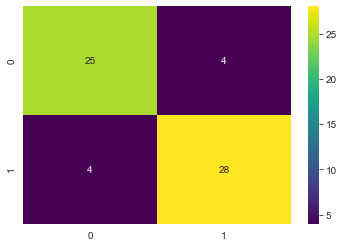

In [162]:
cm=confusion_matrix(y_test,pred_stc)
sns.heatmap(cm,annot=True,cmap='viridis')

Text(0, 0.5, 'True Positive Rate')

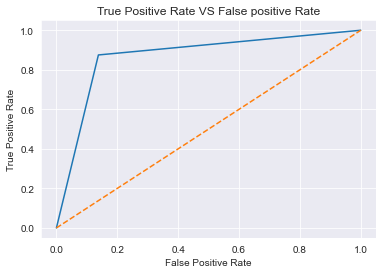

In [163]:
fpr,tpr,thresholds=roc_curve(y_test,pred_stc)
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')
plt.title("True Positive Rate VS False positive Rate")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'PRECISION')

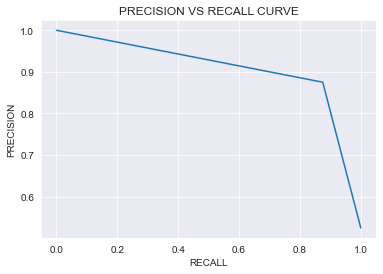

In [164]:
precision,recall,thresholds=precision_recall_curve(y_test,pred_stc)
plt.plot(recall,precision)
plt.title("PRECISION VS RECALL CURVE")
plt.xlabel("RECALL")
plt.ylabel("PRECISION")

# 

# Comapring above all Classifiers

Text(0, 0.5, 'Test Accuracy')

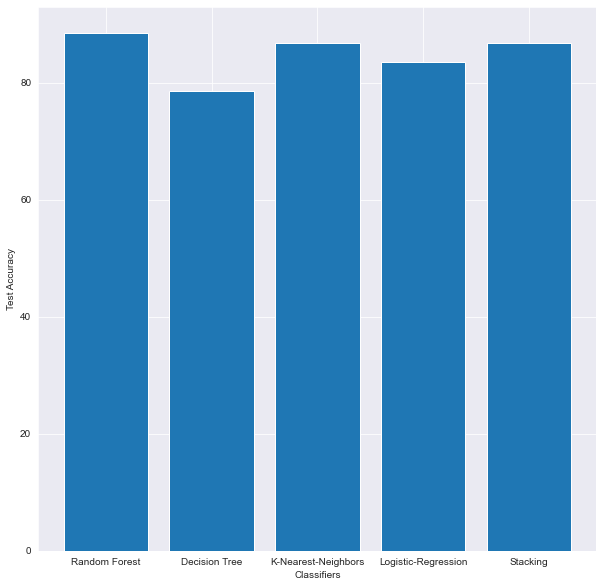

In [184]:
acc_pred_test_rf=accuracy_score(y_test,pred_test_rf)*100
acc_pred_test_dt=accuracy_score(y_test,pred_test_dt)*100
acc_pred_KN=accuracy_score(y_test,pred_KN)*100
acc_pred_lr=accuracy_score(y_test,pred_lr)*100
acc_pred_stc=accuracy_score(y_test,pred_stc)*100
names=['Random Forest','Decision Tree','K-Nearest-Neighbors','Logistic-Regression','Stacking']
plt.figure(figsize=(10,10))
plt.bar(names,[acc_pred_test_rf,acc_pred_test_dt,acc_pred_KN,acc_pred_lr,acc_pred_stc])
plt.xlabel("Test Accuracy of different Classifiers ")
plt.xlabel("Classifiers")
plt.ylabel("Test Accuracy")

# Deep Learning

In [ ]:
import keras
rom keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()
model.add(Dense(250,input_shape=(X.shape)))
model.add(Dropout(0.2))
model.add(Dense(250,input_shape=(X.shape)))
model.add(Dropout(0.2))
model.add(Dense(250,input_shape=(X.shape)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(metrics=['accuracy'],loss='binary_crossentropy',optimizer='adam')
callbacks=EarlyStopping(monitor='val_accuracy')


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=38)

In [ ]:
pred=model.predict_classes(X_test)

In [ ]:
print("Test Accuracy =",accuracy_score(y_test,pred)*100,"%")